# Kelompok 2 C1'20
-----------------------
##### - Didi Nur Rahmad
##### - Olivia Oktavi Utami
##### - Rizki Andryanti

## 1. Import Library

In [3]:
import os

import tensorflow as tf
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

## 2. Membaca Dataset

In [4]:
train = r'Datasets/furniture-images/img/train'
val = r'Datasets/furniture-images/img/val'

## 3. Visualisasi
##### Memvisualisasikan dataset dengan PIE Chart

In [5]:
root_path = r'Datasets'
source_path = os.path.join(root_path, 'furniture-images/img/train')

dataset_info = {}
for label in os.listdir(source_path):
    dataset_info[label] = [file for file in os.listdir(
        os.path.join(source_path, label))]

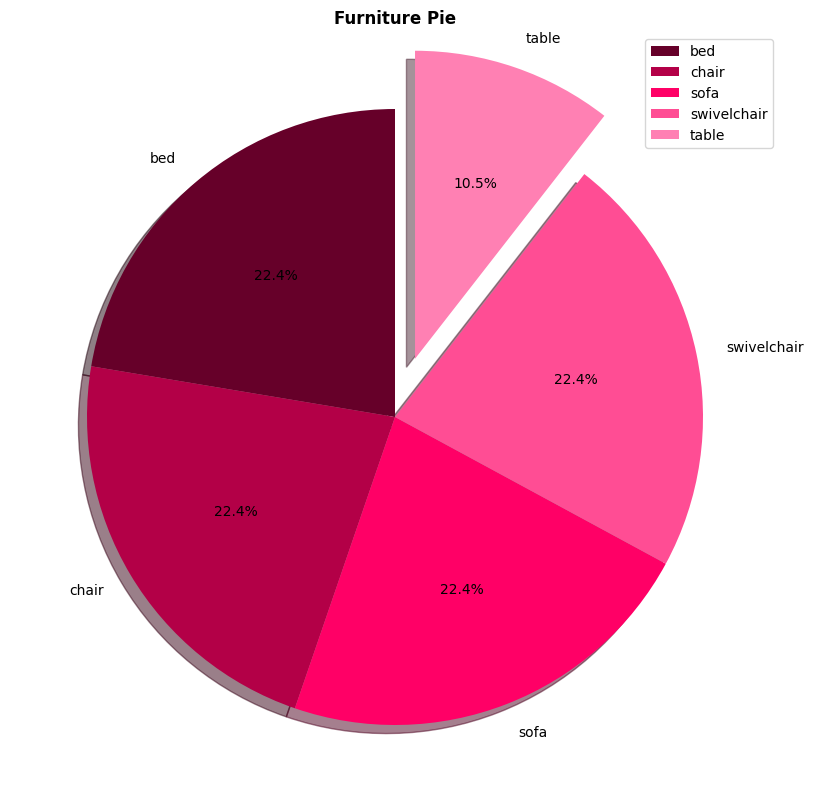

In [6]:
plt.figure(figsize=(10, 10))
plt.pie([len(files) for files in dataset_info.values()],
        labels=dataset_info.keys(),
        startangle=90,
        autopct='%.1f%%',
        explode=[0, 0, 0, 0, 0.2],
        shadow=True,
        colors=['#660029', '#b30047', '#ff0066', '#ff4d94', '#ff80b3'])
plt.title('Furniture Pie', fontweight='bold')
plt.legend()
plt.show()

## 4. Augmentation

In [54]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # horizontal_flip = True,
    rotation_range= 30,
    # shear_range=.2,
    zoom_range=.2,
    # fill_mode='nearest'
    )
train_generator = train_datagen.flow_from_directory(
    train,
    batch_size=64,
    shuffle=True,
    # mengubah resolusi seluruh gambar menjadi 150x100 piksel
    target_size=(150, 150),
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val,
    batch_size=64,
    shuffle=True,
    # mengubah resolusi seluruh gambar menjadi 150x100 piksel
    target_size=(150, 150),
    class_mode='categorical'
)

Found 4024 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


In [55]:
image, lable = train_generator.next()

#### Sample Image

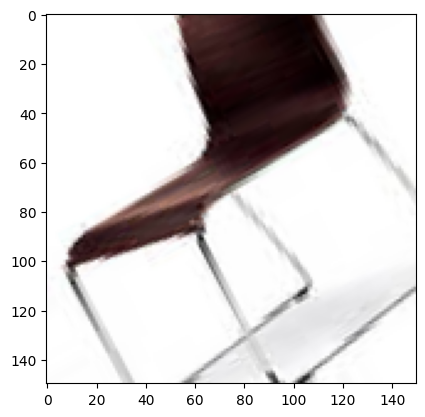

In [56]:
plt.imshow(image[1])
plt.show()

## 5. Membuat Model

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
   

    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 36, 36, 16)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 20736)             0         
                                                                 
 dense_11 (Dense)            (None, 5)                

In [58]:
# from tensorflow.keras.optimizers import RMSprop
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


## Melatih Model

In [59]:
# latih model dengan model.fit
hasil = model.fit(train_generator,validation_data = val_generator, epochs=15)


Epoch 1/15
63/63 [==============================] - 103s 2s/step - loss: 1.2013 - accuracy: 0.5256 - val_loss: 0.8952 - val_accuracy: 0.6643
Epoch 2/15
63/63 [==============================] - 113s 2s/step - loss: 0.8997 - accuracy: 0.6740 - val_loss: 0.8216 - val_accuracy: 0.6974
Epoch 3/15
63/63 [==============================] - 105s 2s/step - loss: 0.8202 - accuracy: 0.7010 - val_loss: 0.7259 - val_accuracy: 0.7139
Epoch 4/15
63/63 [==============================] - 104s 2s/step - loss: 0.7463 - accuracy: 0.7301 - val_loss: 0.6827 - val_accuracy: 0.7518
Epoch 5/15
63/63 [==============================] - 109s 2s/step - loss: 0.7030 - accuracy: 0.7493 - val_loss: 0.6735 - val_accuracy: 0.7707
Epoch 6/15
63/63 [==============================] - 104s 2s/step - loss: 0.6460 - accuracy: 0.7706 - val_loss: 0.6654 - val_accuracy: 0.7636
Epoch 7/15
63/63 [==============================] - 105s 2s/step - loss: 0.6449 - accuracy: 0.7704 - val_loss: 0.6938 - val_accuracy: 0.7612
Epoch 8/15
63

## Visualisasi Hasil Training

In [49]:
y_acc_train = hasil.history['accuracy']
y_acc_val = hasil.history['val_accuracy']

#validation                                 
y_loss_train = hasil.history['loss']
y_loss_val = hasil.history['val_loss']

#epoch
x_ = range(len(y_acc_train))

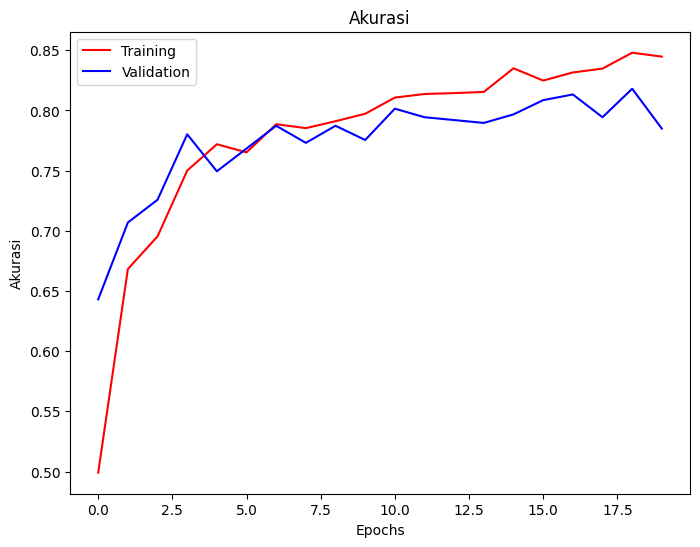

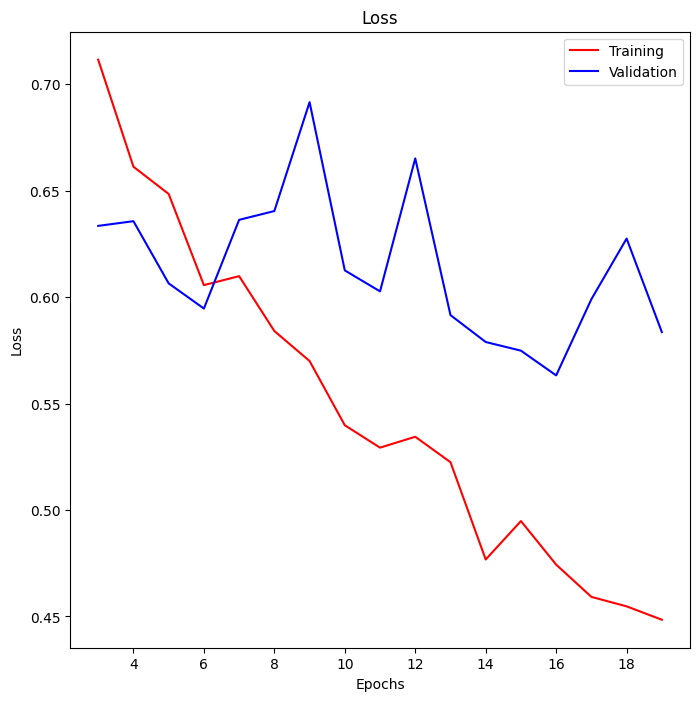

In [50]:
plt.figure(1, figsize=(8,6))
plt.plot(x_, y_acc_train, c='r', label='Training')
plt.plot(x_, y_acc_val, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(8,8))
plt.plot(x_[3:], y_loss_train[3:], c='r', label='Training')
plt.plot(x_[3:], y_loss_val[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
model.evaluate(val_generator)

7/7 [==============================] - 5s 610ms/step - loss: 0.5836 - accuracy: 0.7849


[0.5836122632026672, 0.7848699688911438]

In [44]:
result = model.predict(val_generator)
print(result)

7/7 [==============================] - 4s 565ms/step
[[7.7726850e-03 2.9206711e-01 3.3332694e-03 6.9622260e-01 6.0430192e-04]
 [4.5558834e-01 3.3144242e-01 2.5828570e-02 3.1749792e-02 1.5539086e-01]
 [1.6227610e-05 2.2430416e-02 2.1213552e-02 9.5602357e-01 3.1622712e-04]
 ...
 [8.4022522e-01 3.3765670e-03 1.3658962e-01 1.9550297e-02 2.5834594e-04]
 [3.5497455e-03 2.0725930e-02 1.2678215e-02 9.6259969e-01 4.4642066e-04]
 [2.5139874e-04 1.8813303e-01 1.1274058e-02 6.8666525e-02 7.3167497e-01]]
